<a href="https://colab.research.google.com/github/lamyeamaha/CSE303_Bacteria_Species_Detection/blob/main/Bacteria_Species_detection_using_multiple_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Datasets**


In [ ]:
# train = pd.read_csv("E:/train.csv")
# test = pd.read_csv("E:/test.csv")

train = pd.read_csv("/content/drive/MyDrive/cse 303 data files/CSE 303 PROJECT/train.csv")
test = pd.read_csv("/content/drive/MyDrive/cse 303 data files/CSE 303 PROJECT/test.csv")

In [ ]:
print(train.head())

   row_id     A0T0G0C10  A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  \
0       0 -9.540000e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240   
1       1 -9.540000e-07 -0.000010 -0.000043  0.000886 -0.000200  0.000760   
2       2 -9.540000e-07 -0.000002  0.000007  0.000129  0.000268  0.000270   
3       3  4.630000e-08 -0.000006  0.000012  0.000245  0.000492  0.000522   
4       4 -9.540000e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240   

   A0T0G6C4  A0T0G7C3  A0T0G8C2  ...  A8T0G1C1  A8T0G2C0  A8T1G0C1  A8T1G1C0  \
0 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043 -0.000086 -0.000086   
1 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043  0.000914  0.000914   
2  0.000243  0.000125  0.000001  ...  0.000084  0.000048  0.000081  0.000106   
3  0.000396  0.000197 -0.000003  ...  0.000151  0.000100  0.000180  0.000202   
4 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043 -0.000086 -0.000086   

   A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0     A10T0G0C0 

In [ ]:
print(test.head())

   row_id     A0T0G0C10  A0T0G1C9      A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  \
0  200000 -9.536743e-07 -0.000002 -9.153442e-07  0.000024  0.000034 -0.000002   
1  200001 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114  0.001800 -0.000240   
2  200002  4.632568e-08  0.000003  8.465576e-08 -0.000014  0.000007 -0.000005   
3  200003 -9.536743e-07 -0.000008  8.084656e-06  0.000216  0.000420  0.000514   
4  200004 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114 -0.000200 -0.000240   

   A0T0G6C4  A0T0G7C3  A0T0G8C2  ...  A8T0G0C2  A8T0G1C1  A8T0G2C0  A8T1G0C1  \
0  0.000021  0.000024 -0.000009  ...  0.000039  0.000085  0.000055  0.000108   
1  0.001800 -0.000114  0.000957  ... -0.000043  0.000914 -0.000043 -0.000086   
2 -0.000004  0.000003  0.000004  ...  0.000041  0.000102  0.000084  0.000111   
3  0.000452  0.000187 -0.000005  ...  0.000069  0.000158  0.000098  0.000175   
4 -0.000200 -0.000114 -0.000043  ... -0.000043 -0.000086 -0.000043 -0.000086   

   A8T1G1C0  A8T2G0C0  A9T0G0C1 

**Dropping the row_id**

In [ ]:
row_id = test["row_id"]
test.drop("row_id", axis = 1, inplace = True)
train.drop("row_id", axis = 1, inplace = True)
print(train.head())
print(test.head())

      A0T0G0C10  A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  A0T0G6C4  \
0 -9.540000e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240 -0.000200   
1 -9.540000e-07 -0.000010 -0.000043  0.000886 -0.000200  0.000760 -0.000200   
2 -9.540000e-07 -0.000002  0.000007  0.000129  0.000268  0.000270  0.000243   
3  4.630000e-08 -0.000006  0.000012  0.000245  0.000492  0.000522  0.000396   
4 -9.540000e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240 -0.000200   

   A0T0G7C3  A0T0G8C2  A0T0G9C1  ...  A8T0G1C1  A8T0G2C0  A8T1G0C1  A8T1G1C0  \
0 -0.000114 -0.000043 -0.000010  ... -0.000086 -0.000043 -0.000086 -0.000086   
1 -0.000114 -0.000043 -0.000010  ... -0.000086 -0.000043  0.000914  0.000914   
2  0.000125  0.000001 -0.000007  ...  0.000084  0.000048  0.000081  0.000106   
3  0.000197 -0.000003 -0.000007  ...  0.000151  0.000100  0.000180  0.000202   
4 -0.000114 -0.000043 -0.000010  ... -0.000086 -0.000043 -0.000086 -0.000086   

   A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0   

**Finding Null values**

In [ ]:
print("Number of null values in train data set: ", train.isnull().values.sum())
print("Number of null values in test data set: ", test.isnull().values.sum())

Number of null values in train data set:  0
Number of null values in test data set:  0


In [ ]:
# no null values found as shown on the above cell

**Findind duplicate values and Dropping them**

In [ ]:
print(f'Duplicates in training set: {train.duplicated().sum()}')
print(f'Duplicates in test set: {test.duplicated().sum()}')

train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

Duplicates in training set: 76007
Duplicates in test set: 26779


**Encoding Class Label**

In [ ]:
from sklearn.preprocessing import LabelEncoder
#before encoding:
print(train['target'])
le = LabelEncoder()
train['target'] = le.fit_transform(train['target'])

0           Streptococcus_pyogenes
1              Salmonella_enterica
2              Salmonella_enterica
3              Salmonella_enterica
4               Enterococcus_hirae
                    ...           
199989       Klebsiella_pneumoniae
199990            Escherichia_coli
199991        Bacteroides_fragilis
199995         Salmonella_enterica
199997    Streptococcus_pneumoniae
Name: target, Length: 123993, dtype: object


In [ ]:
Y = train.loc[:, 'target']
print(Y)
X = train.loc[:,:]
X.drop('target', inplace = True, axis = 1)
print(X.head())

0         9
1         6
2         6
3         6
4         2
         ..
199989    5
199990    3
199991    0
199995    6
199997    8
Name: target, Length: 123993, dtype: int64
      A0T0G0C10  A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  A0T0G6C4  \
0 -9.540000e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240 -0.000200   
1 -9.540000e-07 -0.000010 -0.000043  0.000886 -0.000200  0.000760 -0.000200   
2 -9.540000e-07 -0.000002  0.000007  0.000129  0.000268  0.000270  0.000243   
3  4.630000e-08 -0.000006  0.000012  0.000245  0.000492  0.000522  0.000396   
4 -9.540000e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240 -0.000200   

   A0T0G7C3  A0T0G8C2  A0T0G9C1  ...  A8T0G0C2  A8T0G1C1  A8T0G2C0  A8T1G0C1  \
0 -0.000114 -0.000043 -0.000010  ... -0.000043 -0.000086 -0.000043 -0.000086   
1 -0.000114 -0.000043 -0.000010  ... -0.000043 -0.000086 -0.000043  0.000914   
2  0.000125  0.000001 -0.000007  ...  0.000042  0.000084  0.000048  0.000081   
3  0.000197 -0.000003 -0.00000

**Dimensionality Reduction with PCA Scree plot**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

print("Before normalization:\n")
print(X)
print("\n")
ss = MinMaxScaler()
X = ss.fit_transform(X)
print("After normalization: \n")
print(X)

Before normalization:

           A0T0G0C10      A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  \
0      -9.540000e-07 -9.540000e-06 -0.000043 -0.000114 -0.000200 -0.000240   
1      -9.540000e-07 -9.540000e-06 -0.000043  0.000886 -0.000200  0.000760   
2      -9.540000e-07 -1.540000e-06  0.000007  0.000129  0.000268  0.000270   
3       4.630000e-08 -5.540000e-06  0.000012  0.000245  0.000492  0.000522   
4      -9.540000e-07 -9.540000e-06 -0.000043 -0.000114 -0.000200 -0.000240   
...              ...           ...       ...       ...       ...       ...   
199989 -9.540000e-07  1.050000e-05  0.000057  0.000006  0.000080  0.000260   
199990 -9.540000e-07 -4.540000e-06  0.000002  0.000042  0.000066  0.000018   
199991 -9.540000e-07 -4.540000e-06 -0.000019 -0.000053 -0.000092 -0.000129   
199995 -9.540000e-07  4.630000e-07 -0.000003  0.000176  0.000350  0.000290   
199997  4.630000e-08  1.460000e-06 -0.000005 -0.000031 -0.000019 -0.000037   

        A0T0G6C4  A0T0G7C3  A0T0G8C2  A0

In [ ]:
pca = PCA()
pca.fit(X)
pca_data = pca.transform(X)


Text(0.5, 0, 'number of principal component')

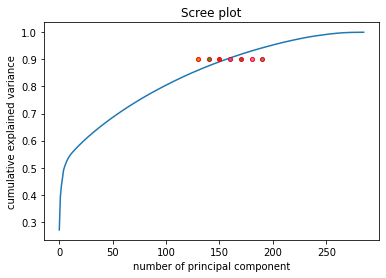

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
y=0.9
x=[130,140,150,160,170,180,190]

for i in range(7):
  plt.plot(x[i],y, marker="o", markersize=4, markeredgecolor="red")

plt.title("Scree plot")
plt.ylabel('cumulative explained variance')
plt.xlabel('number of principal component')

In [ ]:
pca = PCA(n_components = 185)
pca.fit(X)
x_pca = pca.transform(X)


In [ ]:
print("Before: ")
X.shape

Before: 


(123993, 286)

In [ ]:
print("After PCA: ")
x_pca.shape

After PCA: 


(123993, 185)

In [ ]:
X=x_pca

**Classifier 1: Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(C = 1, solver='liblinear', random_state = 42)
logistic_reg.fit(X_train, Y_train)
logistic_reg.score(X_test,Y_test)


0.8752540404529179

In [ ]:
#show the confusion matrix for logistic regression with default parameters
from sklearn.metrics import confusion_matrix
Y_pred_lr = logistic_reg.predict(X_test)

cm_lr = confusion_matrix(Y_test, Y_pred_lr)

Text(69.0, 0.5, 'Actual')

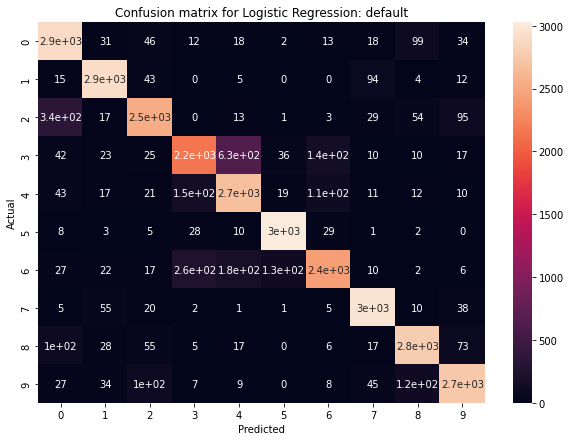

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_lr, annot=True)
plt.title("Confusion matrix for Logistic Regression: default")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# evaluation metrics for default parameter, C= 1 and solver='liblinear'
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_lr))
print("Precision: ", metrics.precision_score(Y_test, Y_pred_lr,average='micro'))
print("Recall: ", metrics.recall_score(Y_test, Y_pred_lr,average='micro'))

Accuracy:  0.8752540404529179
Precision:  0.8752540404529179
Recall:  0.8752540404529179


**ROC Curve for Logistic Regression before hyperparameter tuning**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score


Y_lr = label_binarize(Y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = Y_lr.shape[1]


X_lr_train, X_lr_test, Y_lr_train, Y_lr_test = train_test_split(X, Y_lr, test_size=0.25, random_state=42)


### Learn to predict each class against the other
lr_classifier = OneVsRestClassifier(LogisticRegression(C=1, solver='liblinear', random_state=42))
y_lr_score = lr_classifier.fit(X_lr_train, Y_lr_train).decision_function(X_lr_test)

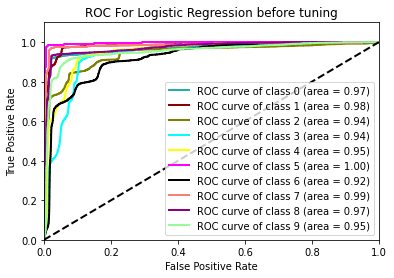

In [ ]:
from itertools import cycle

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_lr_test[:, i], y_lr_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_lr_test[:, i], y_lr_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['lightseagreen', 'darkred', 'olive','cyan','yellow','magenta','black', 'salmon','darkmagenta','palegreen'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.title('ROC For Logistic Regression before tuning')
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Hyperparameter Tuning for Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def Log_reg(c,p,sol):
    print("For C=",c," For Penalty= ",p)
    logistic_reg = LogisticRegression(C = c, solver=sol,penalty=p,max_iter=2000)
    logistic_reg.fit(X_train, Y_train)
    Y_pred_lr = logistic_reg.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_lr))
    print("Precision: ", metrics.precision_score(Y_test, Y_pred_lr,average='micro'))
    print("Recall: ", metrics.recall_score(Y_test, Y_pred_lr,average='micro'))


penalty=['l1', 'l2']
C=[1, 10, 100, 200]
solver= ['newton-cg','liblinear','saga']

In [ ]:
for i in C:
    for j in penalty:
        Log_reg(i,j,'saga')
        print(i,j,'saga')


For C= 1  For Penalty=  l1
Accuracy:  0.897964450466144
Precision:  0.897964450466144
Recall:  0.897964450466144
1 l1 saga
For C= 1  For Penalty=  l2
Accuracy:  0.8875447595083712
Precision:  0.8875447595083712
Recall:  0.8875447595083712
1 l2 saga
For C= 10  For Penalty=  l1
Accuracy:  0.90496467627988
Precision:  0.90496467627988
Recall:  0.90496467627988
10 l1 saga
For C= 10  For Penalty=  l2
Accuracy:  0.8990612600406465
Precision:  0.8990612600406465
Recall:  0.8990612600406465
10 l2 saga
For C= 100  For Penalty=  l1
Accuracy:  0.9053195264363366
Precision:  0.9053195264363366
Recall:  0.9053195264363366
100 l1 saga
For C= 100  For Penalty=  l2
Accuracy:  0.9046743443336882
Precision:  0.9046743443336882
Recall:  0.9046743443336882
100 l2 saga
For C= 200  For Penalty=  l1
Accuracy:  0.9053840446466015
Precision:  0.9053840446466015
Recall:  0.9053840446466015
200 l1 saga
For C= 200  For Penalty=  l2
Accuracy:  0.9049969353850125
Precision:  0.9049969353850125
Recall:  0.9049969353

In [ ]:
for i in C:
    for j in penalty:
        Log_reg(i,j,'liblinear')
        print(i,j,'liblinear')

For C= 1  For Penalty=  l1
Accuracy:  0.8790606148585438
Precision:  0.8790606148585438
Recall:  0.8790606148585438
1 l1 liblinear
For C= 1  For Penalty=  l2
Accuracy:  0.8775766960224524
Precision:  0.8775766960224524
Recall:  0.8775766960224524
1 l2 liblinear
For C= 10  For Penalty=  l1
Accuracy:  0.8789638375431466
Precision:  0.8789638375431466
Recall:  0.8789638375431466
10 l1 liblinear
For C= 10  For Penalty=  l2
Accuracy:  0.8786735055969548
Precision:  0.8786735055969548
Recall:  0.8786735055969548
10 l2 liblinear
For C= 100  For Penalty=  l1
Accuracy:  0.8791573921739411
Precision:  0.8791573921739411
Recall:  0.8791573921739411
100 l1 liblinear
For C= 100  For Penalty=  l2
Accuracy:  0.8792219103842059
Precision:  0.8792219103842059
Recall:  0.8792219103842059
100 l2 liblinear
For C= 200  For Penalty=  l1
Accuracy:  0.8790928739636763
Precision:  0.8790928739636763
Recall:  0.8790928739636763
200 l1 liblinear
For C= 200  For Penalty=  l2
Accuracy:  0.8792219103842059
Precisio

In [ ]:
pen=['l2','none']
for i in C:
    for j in pen:
        Log_reg(i,j,'newton-cg')
        print(i,j,'newton-cg')

For C= 1  For Penalty=  l2
Accuracy:  0.8877060550340333
Precision:  0.8877060550340333
Recall:  0.8877060550340333
1 l2 newton-cg
For C= 1  For Penalty=  none
Accuracy:  0.9041581986515694
Precision:  0.9041581986515694
Recall:  0.9041581986515694
1 none newton-cg
For C= 10  For Penalty=  l2
Accuracy:  0.8964805316300526
Precision:  0.8964805316300526
Recall:  0.8964805316300526
10 l2 newton-cg
For C= 10  For Penalty=  none


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy:  0.9041581986515694
Precision:  0.9041581986515694
Recall:  0.9041581986515694
10 none newton-cg
For C= 100  For Penalty=  l2
Accuracy:  0.9029000935514049
Precision:  0.9029000935514049
Recall:  0.9029000935514049
100 l2 newton-cg
For C= 100  For Penalty=  none


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy:  0.9041581986515694
Precision:  0.9041581986515694
Recall:  0.9041581986515694
100 none newton-cg
For C= 200  For Penalty=  l2
Accuracy:  0.9035130165489209
Precision:  0.9035130165489209
Recall:  0.9035130165489209
200 l2 newton-cg
For C= 200  For Penalty=  none


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy:  0.9041581986515694
Precision:  0.9041581986515694
Recall:  0.9041581986515694
200 none newton-cg


In [ ]:
pen=['l2','none']
for i in C:
    for j in pen:
        Log_reg(i,j,'lbfgs')
        print(i,j,'lbfgs')

For C= 1  For Penalty=  l2
Accuracy:  0.8872866866673118
Precision:  0.8872866866673118
Recall:  0.8872866866673118
1 l2 lbfgs
For C= 1  For Penalty=  none
Accuracy:  0.9049324171747476
Precision:  0.9049324171747476
Recall:  0.9049324171747476
1 none lbfgs
For C= 10  For Penalty=  l2
Accuracy:  0.8986741507790574
Precision:  0.8986741507790574
Recall:  0.8986741507790574
10 l2 lbfgs
For C= 10  For Penalty=  none


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy:  0.9049324171747476
Precision:  0.9049324171747476
Recall:  0.9049324171747476
10 none lbfgs
For C= 100  For Penalty=  l2
Accuracy:  0.9044485305977612
Precision:  0.9044485305977612
Recall:  0.9044485305977612
100 l2 lbfgs
For C= 100  For Penalty=  none


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy:  0.9049324171747476
Precision:  0.9049324171747476
Recall:  0.9049324171747476
100 none lbfgs
For C= 200  For Penalty=  l2
Accuracy:  0.9046420852285557
Precision:  0.9046420852285557
Recall:  0.9046420852285557
200 l2 lbfgs
For C= 200  For Penalty=  none


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy:  0.9049324171747476
Precision:  0.9049324171747476
Recall:  0.9049324171747476
200 none lbfgs


Text(69.0, 0.5, 'Actual')

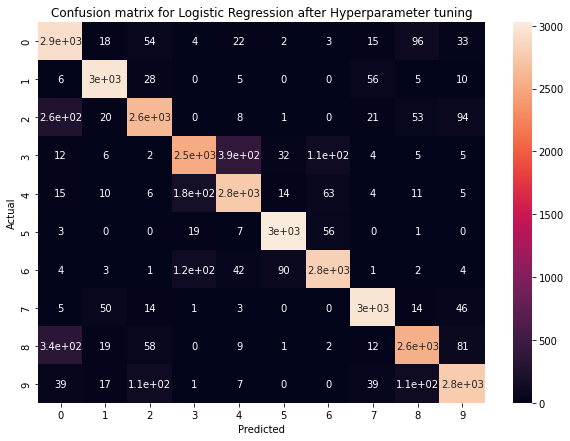

In [ ]:
#confusion matrix for Logistic Regression with the optimal paramters
logistic_reg = LogisticRegression(C = 200, solver='saga', random_state = 42, penalty='l1', max_iter = 2000)
logistic_reg.fit(X_train, Y_train)


Y_pred_lr = logistic_reg.predict(X_test)
cm_lr = confusion_matrix(Y_test, Y_pred_lr)

plt.figure(figsize = (10,7))
sn.heatmap(cm_lr, annot=True)
plt.title("Confusion matrix for Logistic Regression after Hyperparameter tuning")
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [ ]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_lr))
print("Precision: ", metrics.precision_score(Y_test, Y_pred_lr,average='micro'))
print("Recall: ", metrics.recall_score(Y_test, Y_pred_lr,average='micro'))

Accuracy:  0.9020936159230943
Precision:  0.9020936159230943
Recall:  0.9020936159230943


**ROC Curve for Logistic Regression after hyperparameter tuning**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score


Y_lr = label_binarize(Y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = Y_lr.shape[1]


X_lr_train, X_lr_test, Y_lr_train, Y_lr_test = train_test_split(X, Y_lr, test_size=0.25, random_state=42)


### Learn to predict each class against the other
lr_classifier = OneVsRestClassifier(LogisticRegression(C=200, solver='saga', random_state=42, penalty ='l1', max_iter = 2000))
y_lr_score = lr_classifier.fit(X_lr_train, Y_lr_train).decision_function(X_lr_test)

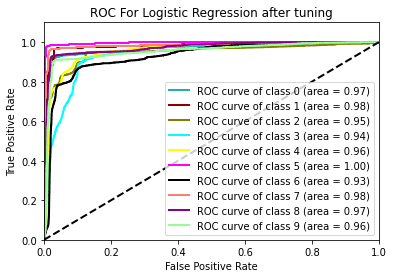

In [ ]:
from itertools import cycle

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_lr_test[:, i], y_lr_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_lr_test[:, i], y_lr_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['lightseagreen', 'darkred', 'olive','cyan','yellow','magenta','black', 'salmon','darkmagenta','palegreen'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.title('ROC For Logistic Regression after tuning')
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Classifier 2: SVM**

In [ ]:
from sklearn import svm
from sklearn import metrics

SVM = svm.SVC(kernel = 'linear', C = 1, random_state = 42)
SVM.fit(X_train, Y_train)
SVM.score(X_test, Y_test)


0.8606729249330624

In [ ]:
#show the confusion matrix for SVM with default parameters
from sklearn.metrics import confusion_matrix
Y_pred_sv = SVM.predict(X_test)

cm_svm = confusion_matrix(Y_test, Y_pred_sv)

Text(69.0, 0.5, 'Actual')

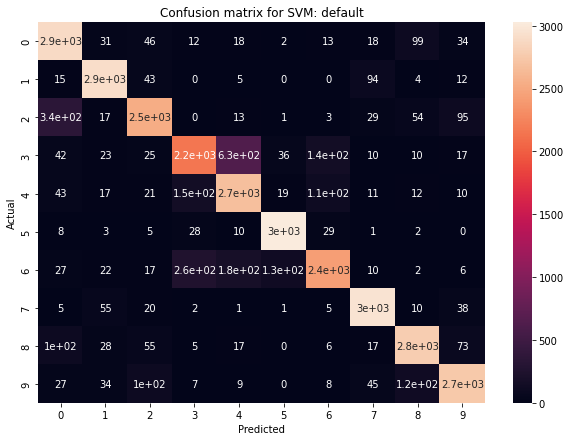

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_lr, annot=True)
plt.title("Confusion matrix for SVM: default")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# evaluation metrics for default parameter, C= 1 and kernel='linear'

print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_sv))
print("Precision: ", metrics.precision_score(Y_test, Y_pred_sv,average='micro'))
print("Recall: ", metrics.recall_score(Y_test, Y_pred_sv,average='micro'))

Accuracy:  0.8606729249330624
Precision:  0.8606729249330624
Recall:  0.8606729249330624


**Hyperparamter Tuning for SVM**

In [ ]:
def SVM_func(ker,c):
    print("For C=",c," For kernel= ",ker)
    SVM = svm.SVC(kernel = ker, C = c,)
    SVM.fit(X_train, Y_train)
    Y_pred_sv = SVM.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_sv))
    print("Precision: ", metrics.precision_score(Y_test, Y_pred_sv,average='micro'))
    print("Recall: ", metrics.recall_score(Y_test, Y_pred_sv,average='micro'))


In [ ]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
C=[0.1,1,10,100,200]

for i in kernels:
    for j in C:
        SVM_func(i,j)
        print(i,j)


For C= 0.1  For kernel=  linear
Accuracy:  0.7833801090357754
Precision:  0.7833801090357754
Recall:  0.7833801090357754
linear 0.1
For C= 1  For kernel=  linear
Accuracy:  0.8428981580050969
Precision:  0.8428981580050969
Recall:  0.8428981580050969
linear 1
For C= 10  For kernel=  linear
Accuracy:  0.8578341236814091
Precision:  0.8578341236814091
Recall:  0.8578341236814091
linear 10
For C= 100  For kernel=  linear
Accuracy:  0.8645762766540857
Precision:  0.8645762766540857
Recall:  0.8645762766540857
linear 100
For C= 200  For kernel=  linear
Accuracy:  0.8644149811284235
Precision:  0.8644149811284235
Recall:  0.8644149811284235
linear 200
For C= 0.1  For kernel=  poly
Accuracy:  0.6805703409787413
Precision:  0.6805703409787413
Recall:  0.6805703409787413
poly 0.1
For C= 1  For kernel=  poly
Accuracy:  0.792186844736927
Precision:  0.792186844736927
Recall:  0.792186844736927
poly 1
For C= 10  For kernel=  poly
Accuracy:  0.9075131455853415
Precision:  0.9075131455853415
Recall:

Text(69.0, 0.5, 'Actual')

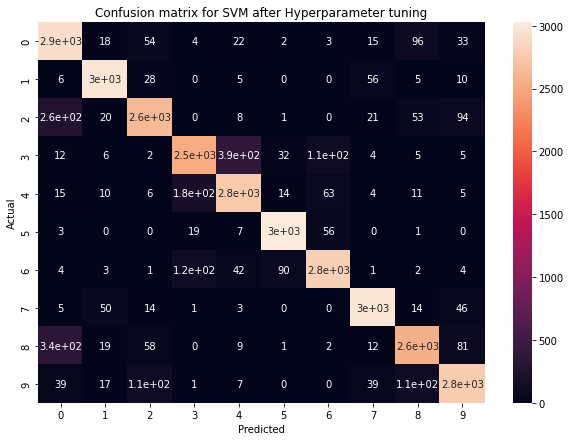

In [ ]:
#confusion matrix for SVM with the optimal paramters
SVM = svm.SVC(kernel = 'poly', C = 100, random_state = 42)
SVM.fit(X_train, Y_train)

SVM.score(X_test,Y_test)


Y_pred_sv = SVM.predict(X_test)
cm_svm = confusion_matrix(Y_test, Y_pred_sv)

plt.figure(figsize = (10,7))
sn.heatmap(cm_lr, annot=True)
plt.title("Confusion matrix for SVM after Hyperparameter tuning")
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [ ]:

print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_sv))
print("Precision: ", metrics.precision_score(Y_test, Y_pred_sv,average='micro'))
print("Recall: ", metrics.recall_score(Y_test, Y_pred_sv,average='micro'))

Accuracy:  0.939385141456176
Precision:  0.939385141456176
Recall:  0.939385141456176


**Visual Summary of Hyperparameter Tuning for logistic regression and SVM**

In [ ]:
import matplotlib.pyplot as plt

def scatterPlt(X,Y1,Y2,xl,yl,t,t1,t2):
    plt.title(t)
    plt.scatter(X,Y1,color='g',s=100)
    plt.scatter(X,Y2,color='y',s=100)
    plt.plot(X,Y1,color='r',label=t1)
    plt.plot(X,Y2,color='b',label=t2)
    plt.xlabel(xl)
    plt.ylabel(yl)

    plt.grid()
    plt.legend()

def scatterPlt2(X,Y1,xl,yl,t):
    plt.title(t)
    plt.scatter(X,Y1,color='g',s=100)
    plt.plot(X,Y1,color='r')
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.grid()
    plt.legend()

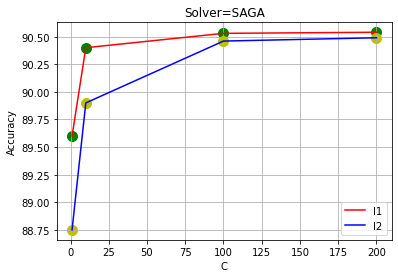

In [ ]:

X=[1,10,100,200]
Y1=[89.6,90.4,90.53,90.54]
Y2=[88.75,89.90,90.46,90.49]
scatterPlt(X,Y1,Y2,'C','Accuracy',"Solver=SAGA","l1","l2")


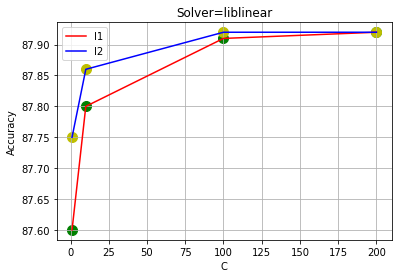

In [ ]:
X=[1,10,100,200]
Y1=[87.6,87.8,87.91,87.92]
Y2=[87.75,87.86,87.92,87.92]
scatterPlt(X,Y1,Y2,'C','Accuracy',"Solver=liblinear","l1","l2")

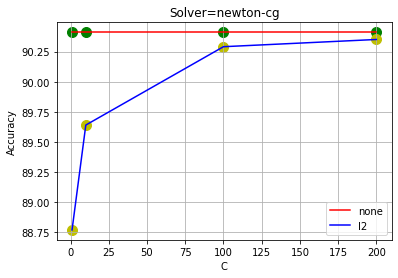

In [ ]:
X=[1,10,100,200]
Y1=[90.41,90.41,90.41,90.41]
Y2=[88.77,89.64,90.29,90.35]
scatterPlt(X,Y1,Y2,'C','Accuracy',"Solver=newton-cg","none","l2")

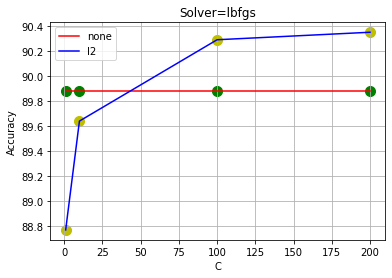

In [ ]:
X=[1,10,100,200]
Y1=[89.88,89.88,89.88,89.88]
Y2=[88.77,89.64,90.29,90.35]
scatterPlt(X,Y1,Y2,'C','Accuracy',"Solver=lbfgs","none","l2")

No handles with labels found to put in legend.


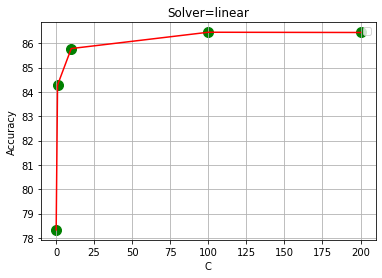

In [ ]:
X1=[0.1,1,10,100,200]
Y1=[78.33,84.28,85.78,86.45,86.44]
scatterPlt2(X1,Y1,'C','Accuracy',"Solver=linear")

No handles with labels found to put in legend.


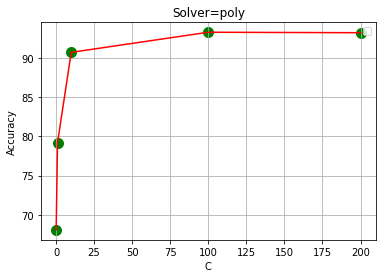

In [ ]:
X1=[0.1,1,10,100,200]
Y1=[68.05,79.21,90.75,93.32,93.26]
scatterPlt2(X1,Y1,'C','Accuracy',"Solver=poly")

No handles with labels found to put in legend.


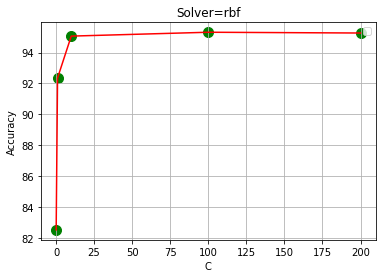

In [ ]:
X1=[0.1,1,10,100,200]
Y1=[82.54,92.35,95.06,95.31,95.26]
scatterPlt2(X1,Y1,'C','Accuracy',"Solver=rbf")

No handles with labels found to put in legend.


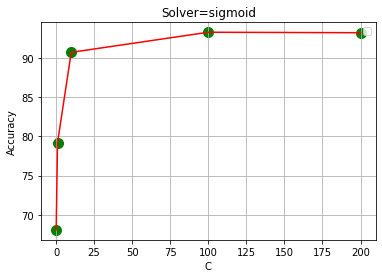

In [ ]:
X1=[0.1,1,10,100,200]
Y1=[68.05,79.21,90.75,93.32,93.26]
scatterPlt2(X1,Y1,'C','Accuracy',"Solver=sigmoid")

**Classifier 3 Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state = 42) #default
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
random_forest_model.score(X_test, Y_test)

0.9469660311622956

In [ ]:
#show the confusion matrix for random forest with default parameters
from sklearn.metrics import confusion_matrix
Y_pred_rf = random_forest_model.predict(X_test)

cm_rf = confusion_matrix(Y_test, Y_pred_rf)

Text(69.0, 0.5, 'Actual')

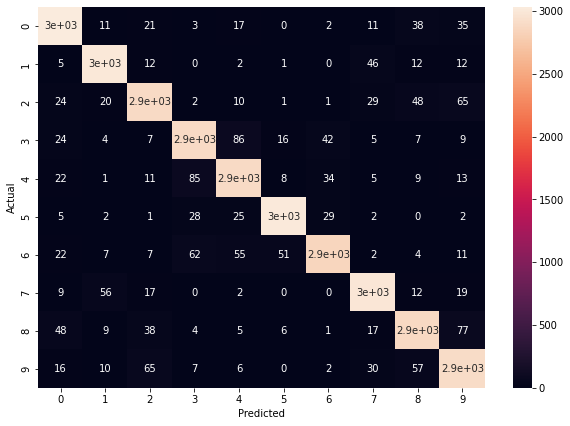

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_rf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# evaluation metrics for default parameter, n_estimators = 100 and criterion='gini'
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_rf))
print("Precision: ", metrics.precision_score(Y_test, Y_pred_rf,average='micro'))
print("Recall: ", metrics.recall_score(Y_test, Y_pred_rf,average='micro'))

Accuracy:  0.9469660311622956
Precision:  0.9469660311622956
Recall:  0.9469660311622956


**Hyperparameter Tuning for Random Forest**

In [ ]:
criterion=['gini', 'entropy']
n_estimators = [10, 30, 50, 100]


rf_acc =[]

def RF_func(n_est,cr):
    print("For Criterion=",cr," For n_estimators= ",n_est)
    random_forest_model = RandomForestClassifier(n_estimators = n_est, criterion=cr, random_state = 42)
    random_forest_model.fit(X_train, Y_train)
    Y_pred_rf = random_forest_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred_rf)
    print("Accuracy: ", accuracy)
    print("Precision: ", metrics.precision_score(Y_test, Y_pred_rf,average='micro'))
    print("Recall: ", metrics.recall_score(Y_test, Y_pred_rf,average='micro'))
    rf_acc.append(accuracy)

for i in n_estimators:
    for j in criterion:
        RF_func(i,j)
        print("\n\n")

For Criterion= gini  For n_estimators=  10
Accuracy:  0.8922223297525727
Precision:  0.8922223297525727
Recall:  0.8922223297525727



For Criterion= entropy  For n_estimators=  10
Accuracy:  0.8923191070679699
Precision:  0.8923191070679699
Recall:  0.8923191070679699



For Criterion= gini  For n_estimators=  30
Accuracy:  0.9268363495596632
Precision:  0.9268363495596632
Recall:  0.9268363495596632



For Criterion= entropy  For n_estimators=  30
Accuracy:  0.9246749895157909
Precision:  0.9246749895157909
Recall:  0.9246749895157909



For Criterion= gini  For n_estimators=  50
Accuracy:  0.9359011581018742
Precision:  0.9359011581018742
Recall:  0.9359011581018742



For Criterion= entropy  For n_estimators=  50
Accuracy:  0.935191457788961
Precision:  0.935191457788961
Recall:  0.935191457788961



For Criterion= gini  For n_estimators=  100
Accuracy:  0.9469660311622956
Precision:  0.9469660311622956
Recall:  0.9469660311622956



For Criterion= entropy  For n_estimators=  100
A

**Visual Summary of Hyperparameter Tuning of Random Forest**

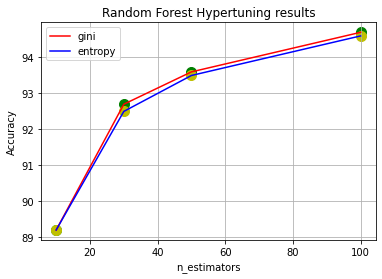

In [ ]:
import matplotlib.pyplot as plt

def scatterPlt3(X,Y1,Y2,xl,yl,t,t1,t2):
    plt.title(t)
    plt.scatter(X,Y1,color='g',s=100)
    plt.scatter(X,Y2,color='y',s=100)
    plt.plot(X,Y1,color='r',label=t1)
    plt.plot(X,Y2,color='b',label=t2)
    plt.xlabel(xl)
    plt.ylabel(yl)

    plt.grid()
    plt.legend()


X=[10,30,50, 100]
Y1=[89.2,92.7,93.6,94.7]
Y2=[89.2,92.5,93.5,94.6 ]
scatterPlt3(X,Y1,Y2,'n_estimators','Accuracy',"Random Forest Hypertuning results","gini","entropy")


In [ ]:
#confusion matrix for random forest after hyperparameter tuning with n_estimators = 100, and criterion = 'gini' gives the best accuracy.
#So, the same confusion matrix and evaluation metrics

**Classifier 4: Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split
X = x_pca
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion = 'gini', splitter='best', random_state = 42) #default parameters
decision_tree_model.fit(X_train, Y_train)
decision_tree_model.score(X_test, Y_test)

0.8971579728378335

In [ ]:
#show the confusion matrix for decision tree with default parameters
from sklearn.metrics import confusion_matrix
Y_pred_dt = decision_tree_model.predict(X_test)

cm_dt = confusion_matrix(Y_test, Y_pred_dt)

Text(69.0, 0.5, 'Actual')

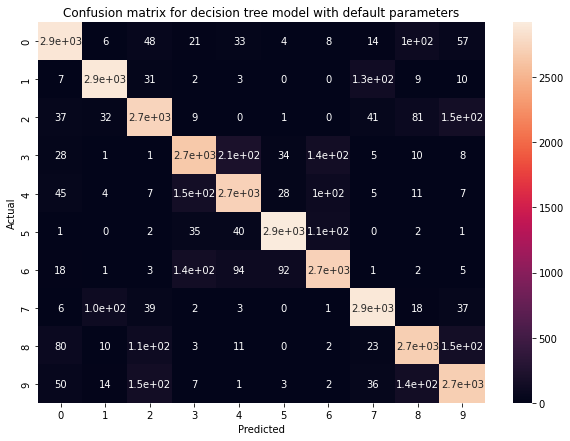

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_dt, annot=True)
plt.title('Confusion matrix for decision tree model with default parameters')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# evaluation metrics for default parameter, splitter = 'best' and criterion='gini'
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_dt))
print("Precision: ", metrics.precision_score(Y_test, Y_pred_dt,average='micro'))
print("Recall: ", metrics.recall_score(Y_test, Y_pred_dt,average='micro'))

Accuracy:  0.8971579728378335
Precision:  0.8971579728378335
Recall:  0.8971579728378335


**Hyperparameter Tuning for Decision Tree**

In [ ]:
criterion=['gini', 'entropy']
splitters = ['best','random']

stored_accuracy = []
comb = []

def DT_func(spl,cr):
    print("For Criterion=",cr," and For splitter= ",spl)
    decision_tree_model = DecisionTreeClassifier(splitter = spl, criterion=cr, random_state = 42)
    decision_tree_model.fit(X_train, Y_train)
    Y_pred_dt = decision_tree_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred_dt)
    print("Accuracy: ", accuracy)
    print("Precision: ", metrics.precision_score(Y_test, Y_pred_dt,average='micro'))
    print("Recall: ", metrics.recall_score(Y_test, Y_pred_dt,average='micro'))
    stored_accuracy.append(accuracy)
    combination = spl + " and " + cr
    comb.append(combination)
    print(combination)

for i in splitters:
    for j in criterion:
        DT_func(i,j)
        print("\n\n")

For Criterion= gini  and For splitter=  best
Accuracy:  0.8971579728378335
Precision:  0.8971579728378335
Recall:  0.8971579728378335
best and gini



For Criterion= entropy  and For splitter=  best
Accuracy:  0.899706442143295
Precision:  0.899706442143295
Recall:  0.899706442143295
best and entropy



For Criterion= gini  and For splitter=  random
Accuracy:  0.8908997064421433
Precision:  0.8908997064421433
Recall:  0.8908997064421433
random and gini



For Criterion= entropy  and For splitter=  random
Accuracy:  0.8926094390141618
Precision:  0.8926094390141618
Recall:  0.8926094390141618
random and entropy





**Visual Summary of Hyperparameter Tuning for Decision Tree**

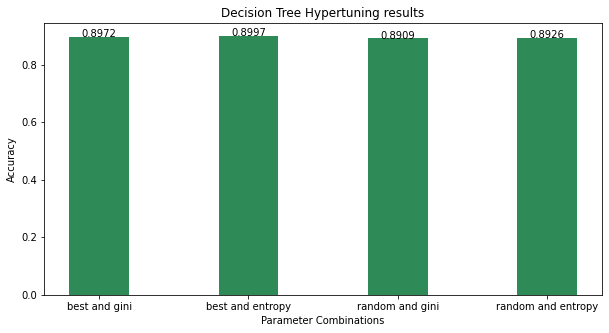

In [ ]:
import matplotlib.pyplot as plt

def barPlt1(X1,Y1,xl,yl,t):
    plt.figure(figsize=(10,5))
    plt.title(t)
    plt.bar(X1,Y1, width = 0.4, color='seagreen')

    for i in range(len(X1)):
      plt.text(i, round(Y1[i],4), round(Y1[i],4), ha = 'center')


    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()


X1= comb
Y1=stored_accuracy
barPlt1(X1,Y1,'Parameter Combinations','Accuracy',"Decision Tree Hypertuning results")


Text(69.0, 0.5, 'Actual')

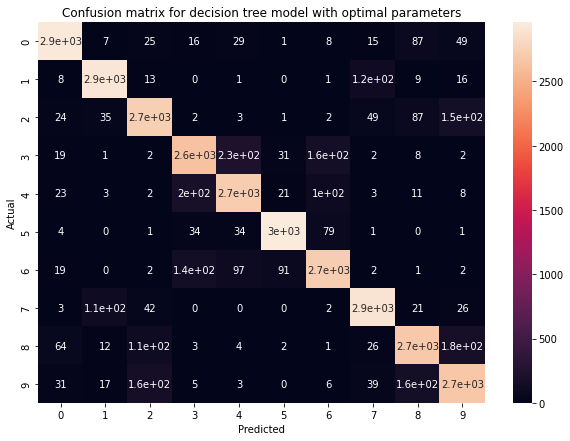

In [ ]:
#confusion matrix for decision tree after hyperparameter tuning with splitter='best', and criterion = 'entropy'
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', splitter='best', random_state = 42) #default parameters
decision_tree_model.fit(X_train, Y_train)

Y_pred_dt = decision_tree_model.predict(X_test)
cm_dt = confusion_matrix(Y_test, Y_pred_dt)


plt.figure(figsize = (10,7))
sn.heatmap(cm_dt, annot=True)
plt.title('Confusion matrix for decision tree model with optimal parameters')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# evaluation metrics for default parameter, splitter = 'best' and criterion='entropy'
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_dt))
print("Precision: ", metrics.precision_score(Y_test, Y_pred_dt,average='micro'))
print("Recall: ", metrics.recall_score(Y_test, Y_pred_dt,average='micro'))

Accuracy:  0.899706442143295
Precision:  0.899706442143295
Recall:  0.899706442143295
